In [48]:
import numpy as np 
import matplotlib.pyplot as plt
from uncertainties import unumpy as unp 

In [82]:
# the measurement data
d = unp.uarray([ 14. , 14.5 , 15. , 15.5 , 16. , 16.5, 17. , 17.5 , 18. , 18.5 , 19. , 19.5 , 20. , 21. , 22. ], [ 0.05 ])            # Unsicherheit 0.5mm
c1 = np.array([ 54404 , 52606 , 47484 , 42623 , 39704 , 35297, 32744 , 29417 , 26662 , 24047 , 22056 , 19799 , 18431 , 14968 , 12256 ])           # Unsicherheit Sqrt[N], ohne Cd
c2 = np.array([ 51701 , 50161 , 45922 , 40788 , 38554 , 34387, 31687 , 28564 , 26295 , 24192 , 21385 , 19329 , 18196 , 14730 , 11559 ])           # mit Cd

c1 = unp.uarray( c1 , np.sqrt(c1))
c2 = unp.uarray( c2 , np.sqrt(c2))

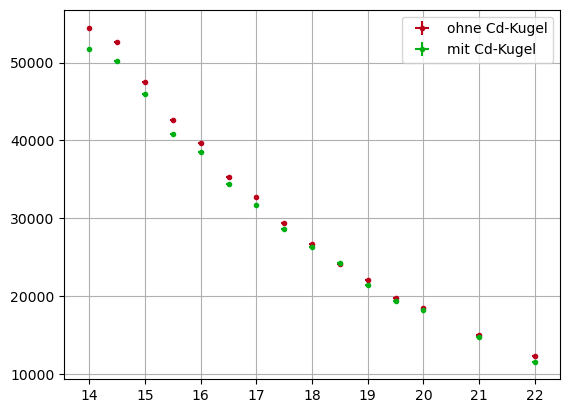

In [83]:
# plotting the data
plt.errorbar( unp.nominal_values(d) , unp.nominal_values(c1) , yerr=unp.std_devs(c1) , xerr=unp.std_devs(d) , fmt=".", color='#BB001C', label='ohne Cd-Kugel')
plt.errorbar( unp.nominal_values(d) , unp.nominal_values(c2) , yerr=unp.std_devs(c2) , xerr=unp.std_devs(d) , fmt=".", color='#00B012', label='mit Cd-Kugel')
#plt.plot(d,c1, ".", color='#BB001C', label='ohne Cd-Kugel')
#plt.plot(d,c2, ".", color='#00B012', label='ohne Cd-Kugel')

# making the plot look nice
plt.legend(), plt.grid()
plt.show()